In [1]:
import pandas as pd
import numpy as np
owid = pd.read_csv('./covid-19-data-master/public/data/owid-covid-data.csv', index_col='continent')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
# owid

df = owid.sort_values('date', ascending=True)
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
owid.tail(20)

,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
continent,,,,,,,,,,,,,,,,,,,,,
Africa,ZWE,Zimbabwe,2021-06-05,39168.0,24.0,33.571,1605.0,0.0,1.571,2635.282,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
Africa,ZWE,Zimbabwe,2021-06-06,39189.0,21.0,35.000,1606.0,1.0,1.714,2636.695,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
Africa,ZWE,Zimbabwe,2021-06-07,39238.0,49.0,39.571,1611.0,5.0,2.429,2639.991,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
Africa,ZWE,Zimbabwe,2021-06-08,39321.0,83.0,46.143,1617.0,6.0,2.571,2645.576,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
Africa,ZWE,Zimbabwe,2021-06-09,39432.0,111.0,57.286,1622.0,5.0,3.286,2653.044,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
Africa,ZWE,Zimbabwe,2021-06-10,39496.0,64.0,57.714,1626.0,4.0,3.143,2657.350,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
Africa,ZWE,Zimbabwe,2021-06-11,39688.0,192.0,77.714,1629.0,3.0,3.429,2670.268,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
Africa,ZWE,Zimbabwe,2021-06-12,39852.0,164.0,97.714,1632.0,3.0,3.857,2681.302,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
Africa,ZWE,Zimbabwe,2021-06-13,39959.0,107.0,110.000,1632.0,0.0,3.714,2688.501,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


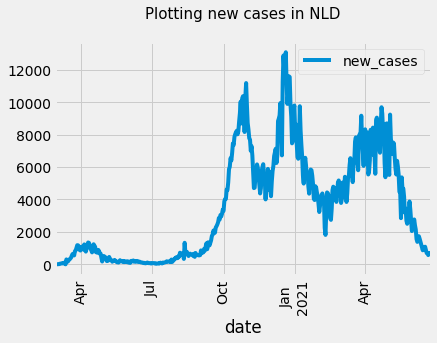

In [2]:
df = owid.sort_values('date', ascending=True)
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
owid.tail(20)

with plt.style.context('fivethirtyeight'):
    df_filtered = df[df.iso_code=='NLD']
    df_filtered.plot(x="date", y=["new_cases"])
    plt.xticks(rotation=90)
    plt.title('Plotting new cases in NLD\n', size=15);
    plt.show()

In [3]:
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)

df_filtered = df[df.iso_code=='NLD']

X_train = []
for i, val in enumerate(df_filtered['date'].to_numpy()):
    X_train.append(i)
X_train = np.asarray(X_train)

# print(X_train)

# X_train = df_filtered['date'].to_numpy()
y_train = df_filtered['new_cases'].to_numpy()

X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

# print(x, y)

svr_rbf = SVR(kernel = 'rbf')
# svr_rbf = SVR(kernel='poly')
svr_rbf_predict = svr_rbf.fit(X_train, y_train)

/home/hamid/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [35]:
y_train

array([[1.0000e+00],
       [0.0000e+00],
       [5.0000e+00],
       [4.0000e+00],
       [8.0000e+00],
       [6.0000e+00],
       [1.4000e+01],
       [4.4000e+01],
       [4.6000e+01],
       [6.0000e+01],
       [7.7000e+01],
       [5.6000e+01],
       [6.1000e+01],
       [1.2100e+02],
       [0.0000e+00],
       [3.0300e+02],
       [1.5600e+02],
       [1.7600e+02],
       [2.7800e+02],
       [2.9500e+02],
       [3.4700e+02],
       [4.0900e+02],
       [5.3600e+02],
       [6.3700e+02],
       [5.7700e+02],
       [5.4700e+02],
       [8.1600e+02],
       [8.5800e+02],
       [1.0300e+03],
       [1.1790e+03],
       [1.1720e+03],
       [1.1110e+03],
       [8.8700e+02],
       [8.5000e+02],
       [1.0290e+03],
       [1.0920e+03],
       [1.0330e+03],
       [9.0600e+02],
       [1.2260e+03],
       [9.7300e+02],
       [7.8300e+02],
       [9.7300e+02],
       [1.2210e+03],
       [1.3460e+03],
       [1.3220e+03],
       [1.1750e+03],
       [9.6400e+02],
       [8.700

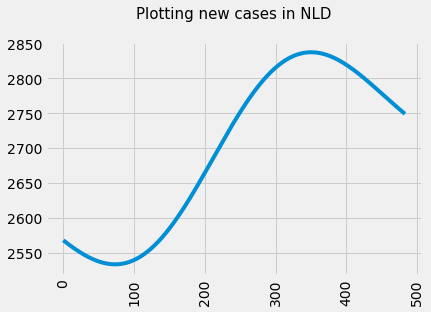

In [5]:
y_predict = svr_rbf_predict.predict(X_train)

with plt.style.context('fivethirtyeight'):
    df_filtered = df[df.iso_code=='NLD']
#     df_filtered.plot(x="date", y=["new_cases"])
    plt.plot(X_train, y_predict)
    plt.xticks(rotation=90)
    plt.title('Plotting new cases in NLD\n', size=15);
    plt.show()


In [6]:
X_test = np.asarray(range(500,1000))
X_test = X_test.reshape(-1,1)

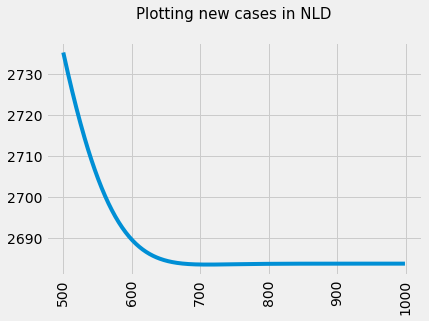

In [7]:
y_predict = svr_rbf_predict.predict(X_test)

with plt.style.context('fivethirtyeight'):
    df_filtered = df[df.iso_code=='NLD']
#     df_filtered.plot(x="date", y=["new_cases"])
    plt.plot(X_test, y_predict)
    plt.xticks(rotation=90)
    plt.title('Plotting new cases in NLD\n', size=15);
    plt.show()

In [8]:
# polynomial kernel

# svr_rbf = SVR(kernel = 'rbf')
svr_rbf = SVR(kernel='poly')
svr_rbf_predict = svr_rbf.fit(X_train, y_train)

/home/hamid/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


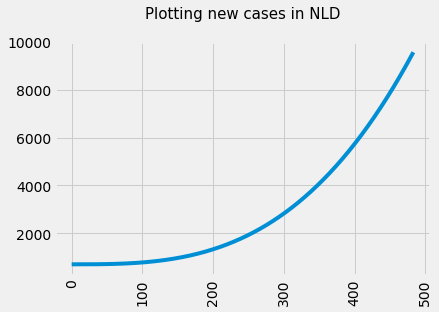

In [9]:
y_predict = svr_rbf_predict.predict(X_train)

with plt.style.context('fivethirtyeight'):
    df_filtered = df[df.iso_code=='NLD']
#     df_filtered.plot(x="date", y=["new_cases"])
    plt.plot(X_train, y_predict)
    plt.xticks(rotation=90)
    plt.title('Plotting new cases in NLD\n', size=15);
    plt.show()

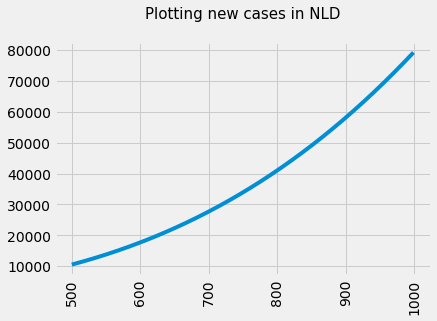

In [10]:
y_predict = svr_rbf_predict.predict(X_test)

with plt.style.context('fivethirtyeight'):
    df_filtered = df[df.iso_code=='NLD']
#     df_filtered.plot(x="date", y=["new_cases"])
    plt.plot(X_test, y_predict)
    plt.xticks(rotation=90)
    plt.title('Plotting new cases in NLD\n', size=15);
    plt.show()

In [ ]:
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
svr_poly_predict = svr_poly.fit(X_train, y_train)

/home/hamid/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [ ]:
y_predict = svr_poly_predict.predict(X_train)

with plt.style.context('fivethirtyeight'):
    df_filtered = df[df.iso_code=='NLD']
#     df_filtered.plot(x="date", y=["new_cases"])
    plt.plot(X_train, y_predict)
    plt.xticks(rotation=90)
    plt.title('Plotting new cases in NLD\n', size=15);
    plt.show()